# **Importing Packages**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Gamma Correction**
$$ V = c_1 \Phi^{\gamma} + c_2 $$
$$$$
where $c_1 = 1$  , $c_2 = 0$ , $ \Phi $ is the luminous flux(normalized)  

In [9]:
def apply_gamma_correction(image, gamma=1.0):
    """
    Apply gamma correction to an image.

    Parameters:
    image (numpy.ndarray): Input image (can be grayscale or RGB/BGR)
    gamma (float): Gamma correction value. Default is 1.0
                  - gamma < 1 will enhance darker regions
                  - gamma > 1 will enhance brighter regions
                  - gamma = 1 leaves the image unchanged

    Returns:
    numpy.ndarray: Gamma-corrected image
    """
    # Ensure image is in floating point format
    if image.dtype != np.float32:
        image = image.astype(np.float32)

    # Normalize pixel values to range [0, 1]
    image = image / 255.0

    # Apply gamma correction
    corrected = np.power(image, 1.0 / gamma)

    # Scale back to original range
    corrected = np.clip(corrected * 255.0, 0, 255).astype(np.uint8)

    return corrected

# **Main Method**

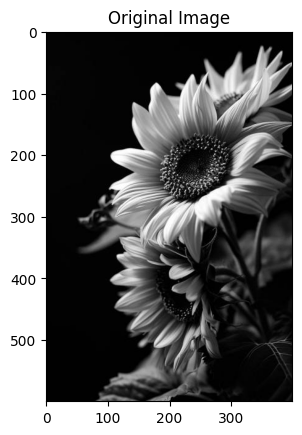

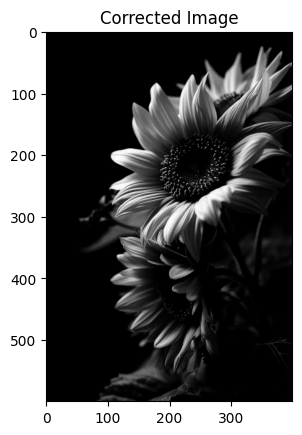

In [12]:
if __name__ == "__main__":
    #Input image path
    image_path = '/content/flower.jpg'
    # Read and display an image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.show()

    # Gamma value
    gamma = 0.5

    #Apply gamma correction
    corrected_image = apply_gamma_correction(image, gamma)

    # Display output image
    output_image_path = image_path[:-4]+'_corrected_output_image'+'_'+str(gamma)+'.jpg'
    cv2.imwrite(output_image_path, corrected_image)
    plt.imshow(corrected_image, cmap='gray')
    plt.title("Corrected Image")
    plt.show()